In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfid = vectorizer.fit_transform(newsgroups_train.data)

In [3]:
x_train_tfid.shape

(11314, 130107)

In [0]:
import numpy as np

In [4]:
phi_t = x_train_tfid
phi = x_train_tfid.transpose()
phi_t.shape

(11314, 130107)

In [8]:
newsgroups_train.target[1]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [14]:
# theta is m * k, m = 130107 and k = 2. It is randomly initialized. 
m = 130107
k = 2
theta_initialize = np.random.rand(m, k) 
theta,_= np.linalg.qr(theta_initialize)
theta.shape

(130107, 2)

In [0]:
# in the next iteration, theta is calculated as theta_t1 = phi * phi_t * Theta
for i in range (1,500):
  z = phi_t @ theta
  theta_t1 = phi @ z
  #z = np.matmul(phi_t, theta)
  #theta_t1 = np.matmul(phi,z)
  theta,_ = np.linalg.qr(theta)

In [16]:
theta_transpose = theta.transpose()
y = theta_transpose @ phi
y.shape

(2, 11314)

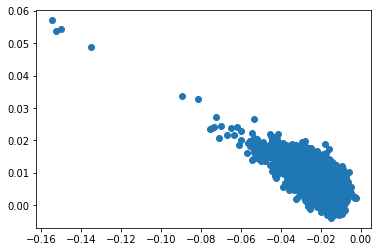

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y[0,:],y[1,:])

# color documents in seperate groups different